## Malignant Melanoma Exploratory Data Analysis
Written By: Heidi   

Here we will explore the [**Melanoma**](https://stat.ethz.ch/R-manual/R-devel/library/boot/html/melanoma.html) dataset through exploratory data analysis (EDA).

**Time Frame Conducted:** 1962 - 1977    
**Location:** Department of Plastic Surgery, University Hospital of Odense, Denmark   
**Research Question:** Does thickness and/or ulcerated tumors have an increase chance of death from malignant melanoma?  

**Synopsis of Study:** Measurements were made on patients with malignant melanoma with each patient's tumor removed. During the surgery the tumor is removed with around 2.5cm of the surrounding skin. Measurements of thickness and ulcerated presence were taken as these variables were predicted to increase the chance of death from the disease. Patients were followed until the end of 1977.

This dataset consists of 205 observations and 7 variables:

VARIABLE|DESCRIPTION
-|:---
time|Survival time in days since the operation, possibly censored.
status|The patients status at the end of the study. <br>1: died from melanoma<br>2: still alive <br>3: died from causes unrelated to their melanoma.
sex|The patients sex<br> 1: male<br>0: female.
age|Age in years at the time of the operation.
year|Year of operation.
thickness|Tumour thickness in mm.
ulcer|Indicator of ulceration<br> 1: present<br>0: absent.

Status Summary<br>of this Study|Percentage
-:|:-
**Alive**|65.37%
**Dead**|27.84%
**Unrelated**|6.80%

 
**Malignant Melanoma** is the most serious form of skin cancer - it develops from unrepairable DNA damage to skin cells, mainly caused by intense or occasional exposure to ultraviolet (UV) radiation from the sun or tanning beds, mutating skin cells to rapidly multiple and forming malignant tumors. Melanoma are most common in the form of black or brown moles (but can form in tissues as well).   

The skin consists of 3 layers:
 + Epidermis – outermost layer
 + Dermis – second layer
 + Hypodermis – last layer
 
When melanoma is found in the epidermis it is seen as situ or noninvasive, if found in the dermis it is seen as invasive. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('melanoma.csv')
mela = df.copy()
mela.head()

,patient,time,status,sex,age,year,thickness,ulcer
0,1,10,3,1,76,1972,6.76,1
1,2,30,3,1,56,1968,0.65,0
2,3,35,2,1,41,1977,1.34,0
3,4,99,3,0,71,1968,2.90,0
4,5,185,1,1,52,1965,12.08,1


In [2]:
#Relabeling data for easier visualization
#Convert the unit of Time from Days to Years
mela['status'].replace([1,2,3],['Dead','Alive','Unrelated'], inplace=True) 
mela['sex'].replace([0,1],['Female','Male'], inplace=True)
mela['ulcer'].replace([0,1],['Absent','Present'], inplace=True)
mela['time'] = mela['time']/365

#New variable creation: stage
#based off thickness
conditions = [(mela.thickness<=1),
              (mela.thickness<=2),
              (mela.thickness)>2]
values = ['Stage 1','Stage 2','Stage 3']
mela['stage'] = np.select(conditions,values)

#Remove obersevations for 'Unrelated' deaths
mela.drop(mela[mela['status']=='Unrelated'].index, inplace=True)

,patient,time,age,year,thickness,Alive,Dead,Female,Male,Absent,Present,Stage 1,Stage 2,Stage 3
2,3,0.095890,41,1977,1.34,1,0,0,1,1,0,0,1,0
4,5,0.506849,52,1965,12.08,0,1,0,1,0,1,0,0,1
5,6,0.558904,28,1971,4.84,0,1,0,1,0,1,0,0,1
6,7,0.575342,77,1972,5.16,0,1,0,1,0,1,0,0,1
8,9,0.635616,49,1968,12.88,0,1,0,1,0,1,0,0,1


In [3]:
mela.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,191.0,106.000000,57.873728,3.00000,57.500000,106.000000,154.500000,205.000000
time,191.0,6.061651,2.992189,0.09589,4.310959,5.545205,8.368493,15.246575
age,191.0,51.523560,16.652113,4.00000,41.000000,54.000000,63.500000,95.000000
year,191.0,1969.937173,2.580541,1962.00000,1968.000000,1971.000000,1972.000000,1977.000000
thickness,191.0,2.861361,2.907033,0.10000,0.970000,1.940000,3.540000,17.420000


In [8]:
mela.nunique()

patient      191
time         181
status         2
sex            2
age           68
year          12
thickness     61
ulcer          2
stage          3
dtype: int64

<AxesSubplot:>

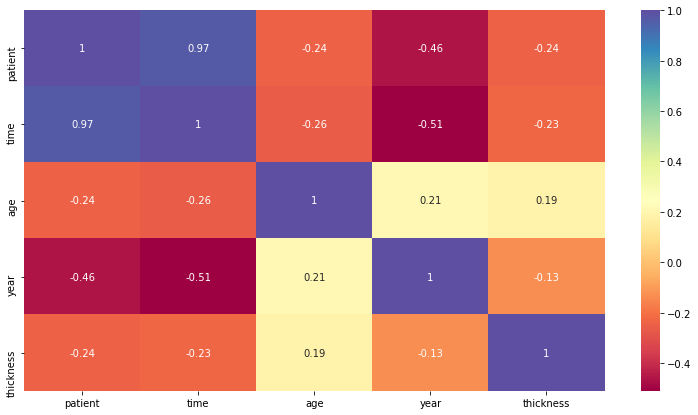

In [4]:
fig, ax = plt.subplots(figsize=(13, 7))
correlation_matrix = mela.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='Spectral', ax=ax)

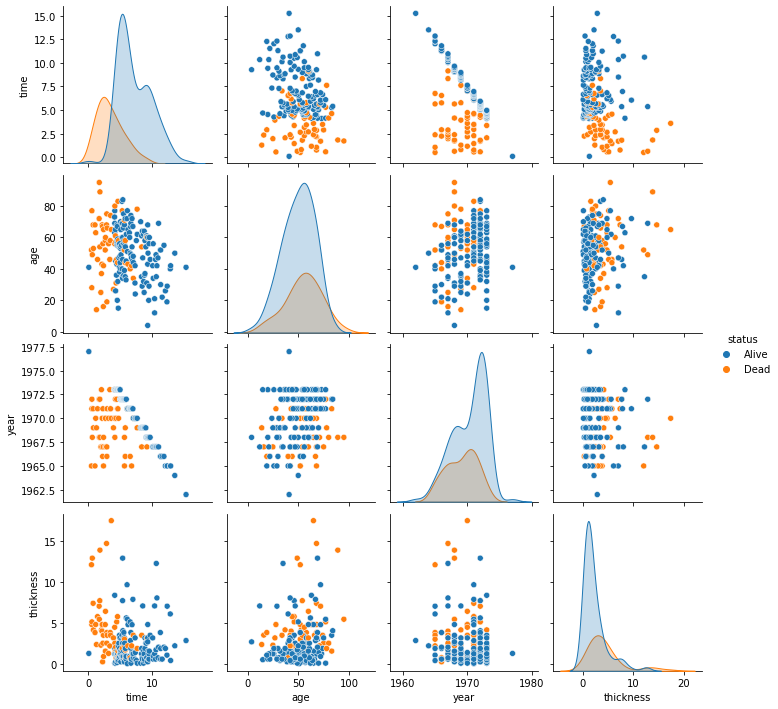

In [15]:
sns.pairplot(mela.drop(['patient'], axis = 1), hue="status")

There is a critical time frame of around 5 years based on the status of the patients for all stages

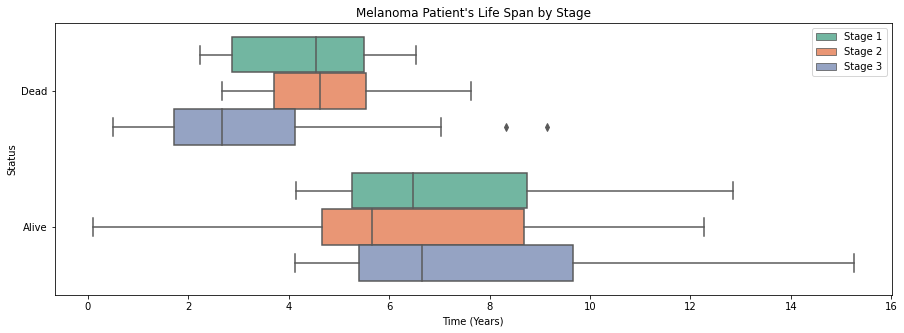

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="time", y="status", data=mela,
            orient="h", palette="Set2",
            hue="stage", hue_order=["Stage 1","Stage 2","Stage 3"],
            order=["Dead","Alive"], ax=ax)

plt.xlabel("Time (Years)")
plt.ylabel("Status")
plt.title("Melanoma Patient's Life Span by Stage")
plt.gca().legend().set_title('')

In [34]:
mela.groupby(['status','stage']).time.describe()

count      mean       std       min       25%       50%  \
status stage                                                              
Alive  Stage 1   47.0  7.072807  2.280189  4.142466  5.261644  6.468493   
       Stage 2   42.0  6.643705  2.641188  0.095890  4.671918  5.652055   
       Stage 3   45.0  7.792268  2.791146  4.131507  5.397260  6.646575   
Dead   Stage 1    6.0  4.333333  1.746193  2.238356  2.876712  4.534247   
       Stage 2    7.0  4.772603  1.666885  2.676712  3.704110  4.630137   
       Stage 3   44.0  3.096762  2.090023  0.506849  1.717808  2.669863   

                     75%        max  
status stage                         
Alive  Stage 1  8.745205  12.843836  
       Stage 2  8.693151  12.271233  
       Stage 3  9.652055  15.246575  
Dead   Stage 1  5.503425   6.542466  
       Stage 2  5.535616   7.621918  
       Stage 3  4.132877   9.145205

Female patients are twice as likely to live through melanoma than male patients

status,Alive,Dead
sex,,
Female,0.476440,0.146597
Male,0.225131,0.151832


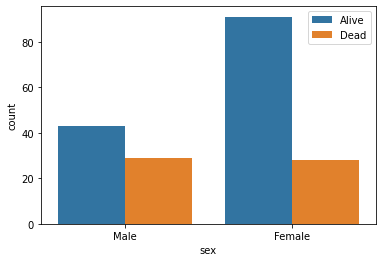

In [10]:
sns.countplot(x="sex", hue='status', data=mela)
plt.gca().legend().set_title('')
pd.crosstab(mela['sex'], mela['status'], normalize='all')

Presence of an ulceration show survival rates to be 50:50 regardless of sex   
Patients are 5.7 times more likely to survive if they do not show ulceration

status,Alive,Dead
ulcer,,
Absent,0.481675,0.08377
Present,0.219895,0.21466


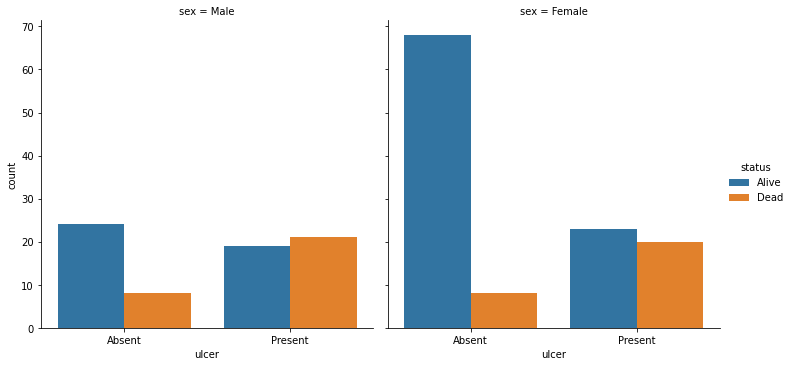

In [11]:
sns.catplot(x="ulcer", col="sex", hue="status", data=mela, kind='count')
pd.crosstab(mela['ulcer'], mela['status'], normalize='all') 

The first 4 years are the most crucial in the melanoma progression

<AxesSubplot:xlabel='time', ylabel='Count'>

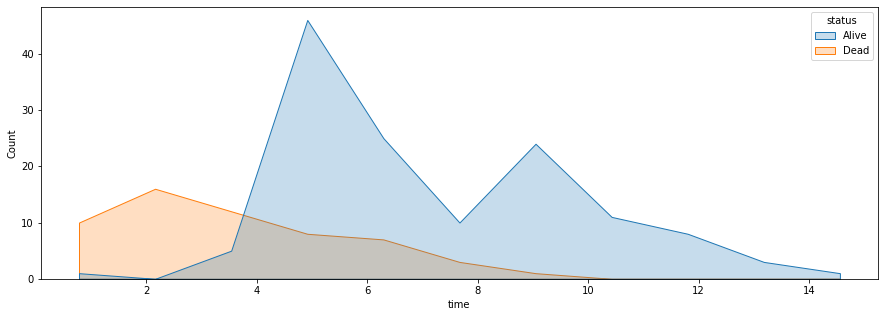

In [12]:
plt.figure(figsize=(15, 5))
sns.histplot(mela, x="time", hue="status", element="poly")

Most deaths occur in patients with an ulceration and larger thicknesses   
Patients without an ulceration generally have a smaller thickness

<Figure size 1080x360 with 0 Axes>

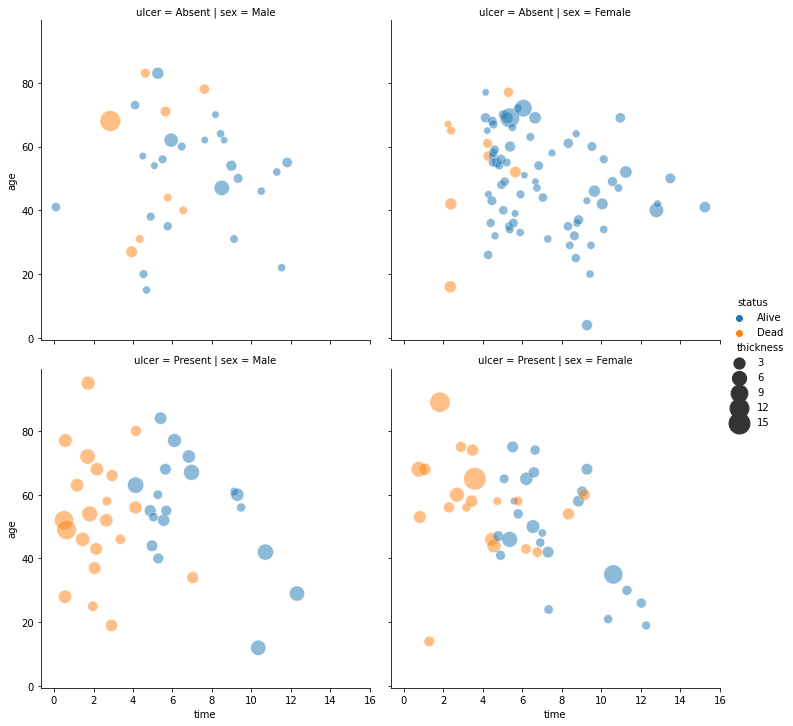

In [14]:
plt.figure(figsize=(15, 5))
sns.relplot(data=mela, x="time", y="age", col="sex", row="ulcer", hue="status", size="thickness", 
            kind="scatter", alpha=0.5, sizes=(50,500))

**Answer to Research Question:**   
Yes, both thickness and presence of an ulcerated tumor increases the chance of death from malignant melanoma.
+ Females are twice as likely to survive than males
+ The first 4 years are the most crucial (majority of deaths occur between 2 - 4.5 years with an average of 3.5 years)
+ Essentially it becomes more crucial with age
+ Factors that worsen chances of survival are:
  + The presence of an ulceration (survival rates drop to 50 - 50, regardless of sex)
  + Larger thicknesses shows a higher probability in the formation of an ulceration